In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from plantcv import plantcv as pcv

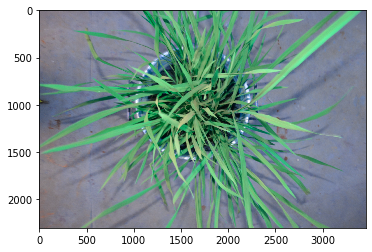

In [40]:
img, path, filename = pcv.readimage(filename='/media/shadowsaint/New Volume/1. RVCE/7th Sem/5. CV/Images/DSC_0007.JPG', mode='rgb')
plt.imshow(img)

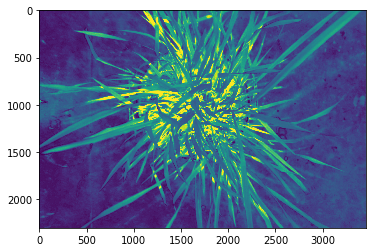

In [41]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')
plt.imshow(s)

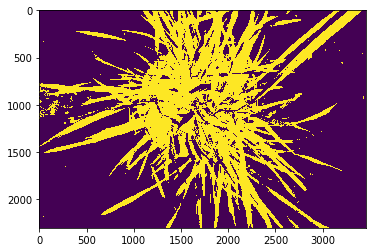

In [42]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')
plt.imshow(s_thresh)

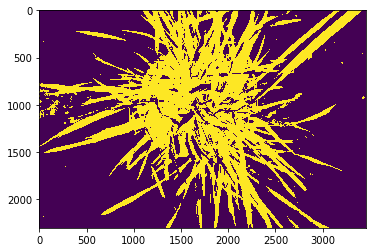

In [43]:
s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)
plt.imshow(s_mblur)

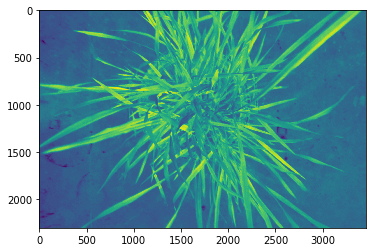

In [44]:
#Approach 2: RGB to LAB
b = pcv.rgb2gray_lab(rgb_img=img, channel='b')
plt.imshow(b)

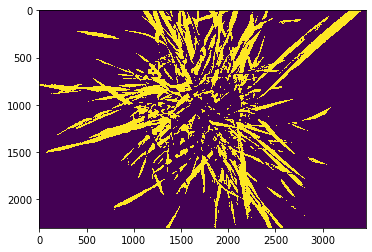

In [45]:
b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
plt.imshow(b_thresh)

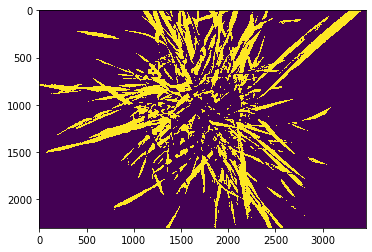

In [46]:
b_cnt = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')
plt.imshow(b_cnt)

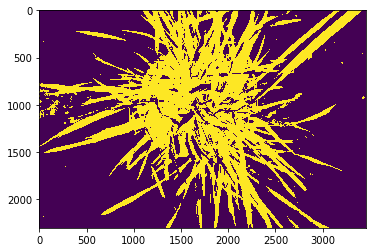

In [47]:
bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_cnt)
plt.imshow(bs)

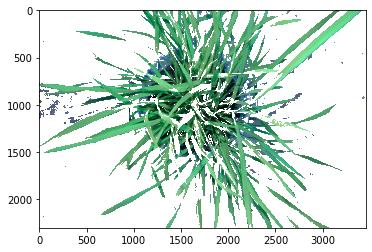

In [48]:
masked = pcv.apply_mask(rgb_img=img, mask=bs, mask_color='white')
plt.imshow(masked)

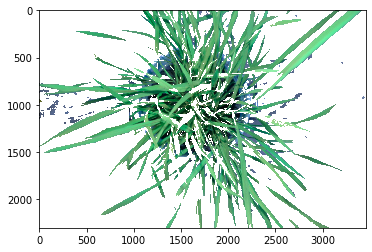

In [49]:
# Convert RGB to LAB and extract the Green-Magenta and Blue-Yellow channels
masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
masked_b = pcv.rgb2gray_lab(rgb_img=masked, channel='b')

# Threshold the green-magenta and blue images
maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')
maskeda_thresh1 = pcv.threshold.binary(gray_img=masked_a, threshold=135, max_value=255, object_type='light')
maskedb_thresh = pcv.threshold.binary(gray_img=masked_b, threshold=128, max_value=255, object_type='light')

# Join the thresholded saturation and blue-yellow images (OR)
ab1 = pcv.logical_or(bin_img1=maskeda_thresh, bin_img2=maskedb_thresh)
ab = pcv.logical_or(bin_img1=maskeda_thresh1, bin_img2=ab1)

# Fill small objects
ab_fill = pcv.fill(bin_img=ab, size=200)

# Apply mask
masked2 = pcv.apply_mask(rgb_img=masked, mask=ab_fill, mask_color='white')
plt.imshow(masked2)

In [50]:
id_objects, obj_hierarchy = pcv.find_objects(masked2, ab_fill)

roi1, roi_hierarchy= pcv.roi.rectangle(img=masked2, x=100, y=100, h=200, w=200)

roi_objects, hierarchy3, kept_mask, obj_area = pcv.roi_objects(img=img, roi_contour=roi1,
                                                                   roi_hierarchy=roi_hierarchy, 
                                                                   object_contour=id_objects, 
                                                                   obj_hierarchy=obj_hierarchy,
                                                                   roi_type='partial')

obj, mask = pcv.object_composition(img=img, contours=roi_objects, hierarchy=hierarchy3)